
Drift Detection Report:
           KS_statistic   p_value drift_detected
feature_1        0.218       0.0           True
feature_2         0.06  0.054627          False


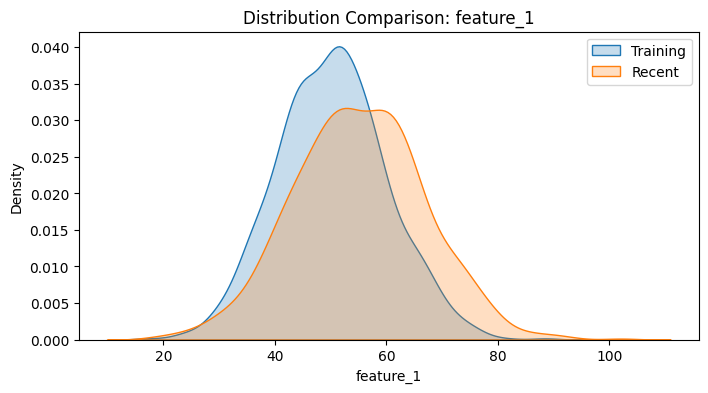

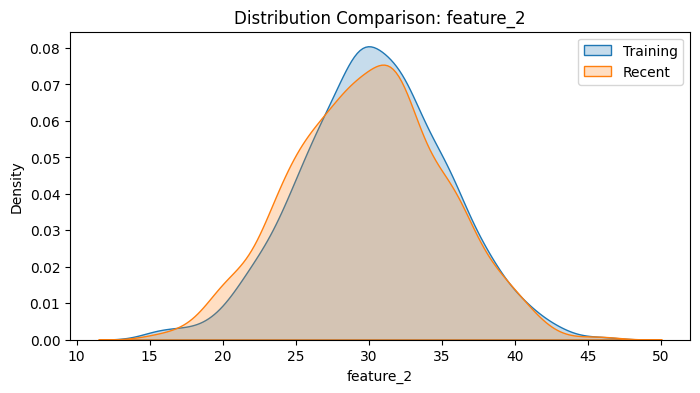

In [3]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.

import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Simulate historical (training) and recent (unseen) data
np.random.seed(42)

# Training data (historical)
train_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=50, scale=10, size=1000),
    'feature_2': np.random.normal(loc=30, scale=5, size=1000)
})

# Recent data (with drift)
recent_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=55, scale=12, size=1000),  # Drifted mean and std
    'feature_2': np.random.normal(loc=30, scale=5, size=1000)    # No drift
})

# Task 2: Monitor distribution changes using KS-test
def detect_data_drift(train, recent):
    drift_results = {}
    for column in train.columns:
        stat, p_value = ks_2samp(train[column], recent[column])
        drift_results[column] = {
            'KS_statistic': stat,
            'p_value': p_value,
            'drift_detected': p_value < 0.05
        }
    return pd.DataFrame(drift_results).T

drift_report = detect_data_drift(train_data, recent_data)
print("\nDrift Detection Report:\n", drift_report)

# Task 3: Visualize data drift
for feature in train_data.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(train_data[feature], label='Training', fill=True)
    sns.kdeplot(recent_data[feature], label='Recent', fill=True)
    plt.title(f'Distribution Comparison: {feature}')
    plt.legend()
    plt.show()






In [4]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.


import pandas as pd
import great_expectations as ge
from great_expectations.dataset import PandasDataset

# Task 1: Set up a sample dataset
data = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "age": [25, 30, 35, None, 40],
    "email": ["a@example.com", "b@example.com", "c@example.com", "d@example.com", None]
})

# Wrap the DataFrame using Great Expectations
ge_df = ge.from_pandas(data)

# Task 3: Define expectations
ge_df.expect_column_to_exist("id")
ge_df.expect_column_values_to_be_unique("id")
ge_df.expect_column_values_to_not_be_null("name")
ge_df.expect_column_values_to_be_between("age", 18, 60)
ge_df.expect_column_values_to_match_regex("email", r"[^@]+@[^@]+\.[^@]+")

# Validate the expectations
results = ge_df.validate()
print("\nValidation Results Summary:\n", results["statistics"])


ModuleNotFoundError: No module named 'great_expectations'